<a href="https://colab.research.google.com/github/devadethan452/ICT.DSA.DEVADETH/blob/main/EXIT_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [255]:
##importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset**

---




In [256]:
df = pd.read_csv("/content/drive/MyDrive/DSA DATASETS/customer_churn.csv")

In [257]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Understanding the the data**

---



In [258]:
df.shape

(7043, 21)

the dataset have 21 columns and 7043 rows

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


there are a lot of missing values and most of the datatypes are objects and float

In [260]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [261]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [262]:
df.duplicated().sum()

np.int64(0)

# **Handling missing values**

---



In [263]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [264]:
object_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [265]:
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [266]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [267]:
df.duplicated().sum()

np.int64(0)

# **Encoding the data**

---



In [268]:
object_cols = df.select_dtypes(include='object').columns

In [269]:
from sklearn.preprocessing import LabelEncoder

In [270]:
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [271]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0.0,1,0,1.0,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2503,0
1,3962,1,0.0,0,0,34.0,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1464,0
2,2564,1,0.0,0,0,2.0,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0.0,0,0,45.0,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1398,0
4,6511,0,0.0,0,0,2.0,1,0,1,0,...,0,0,0,0,0,1,2,70.70,924,1


# **Data Visualization**

---



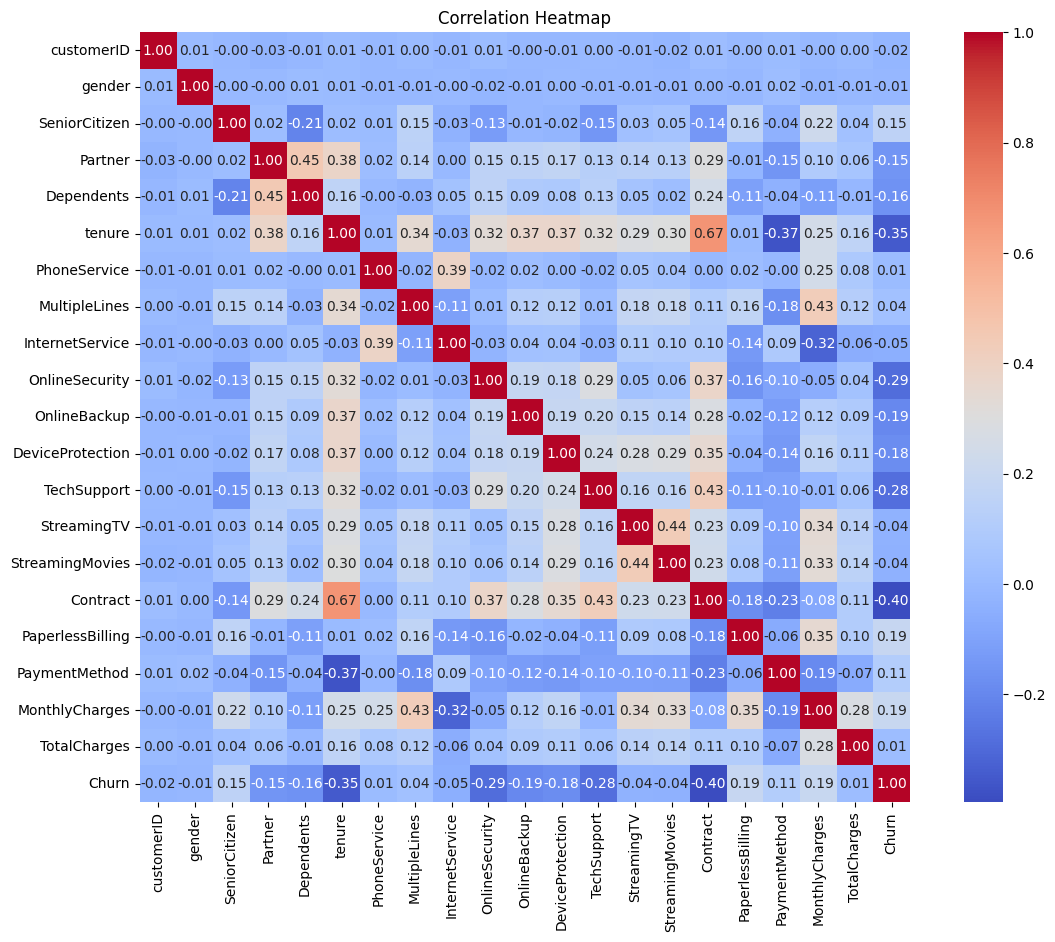

In [272]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()



*   monthly charges and senior citizen has psitive correlation to churn
*   contract and tenure has strong negative correlation

       - increase of monthly charges leads to churn



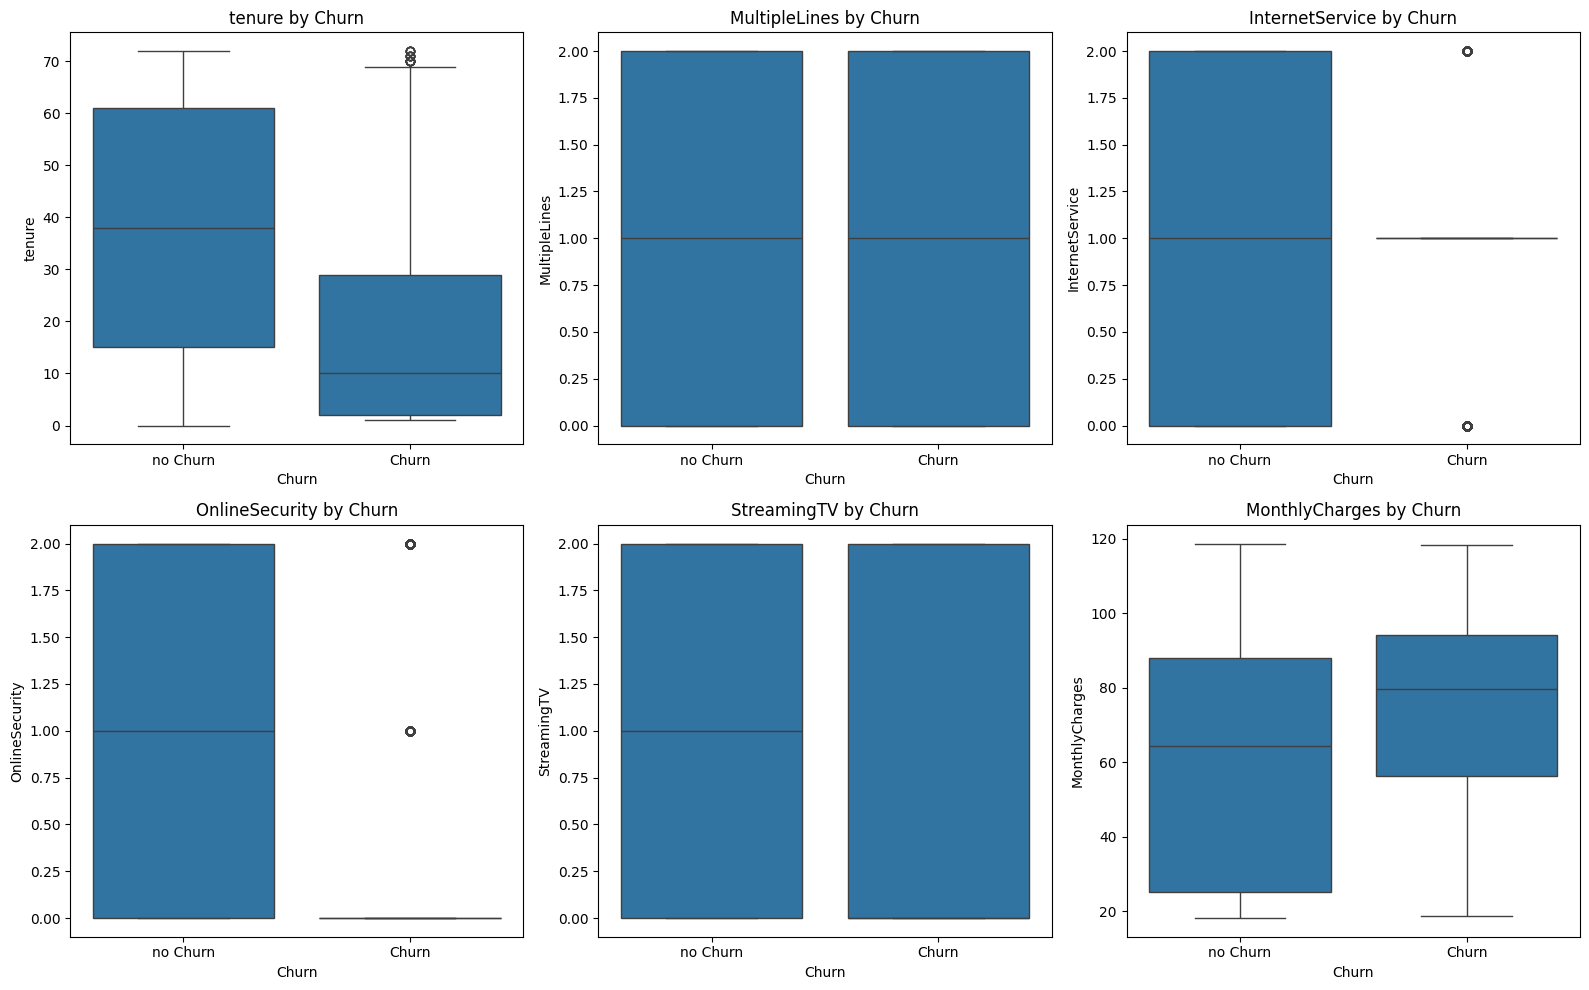

In [279]:
key_features = ['tenure','MultipleLines','InternetService','OnlineSecurity','StreamingTV','MonthlyCharges']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f"{feature} by Churn")
    plt.xticks([0, 1], ['no Churn', 'Churn'])
plt.tight_layout()
plt.show()

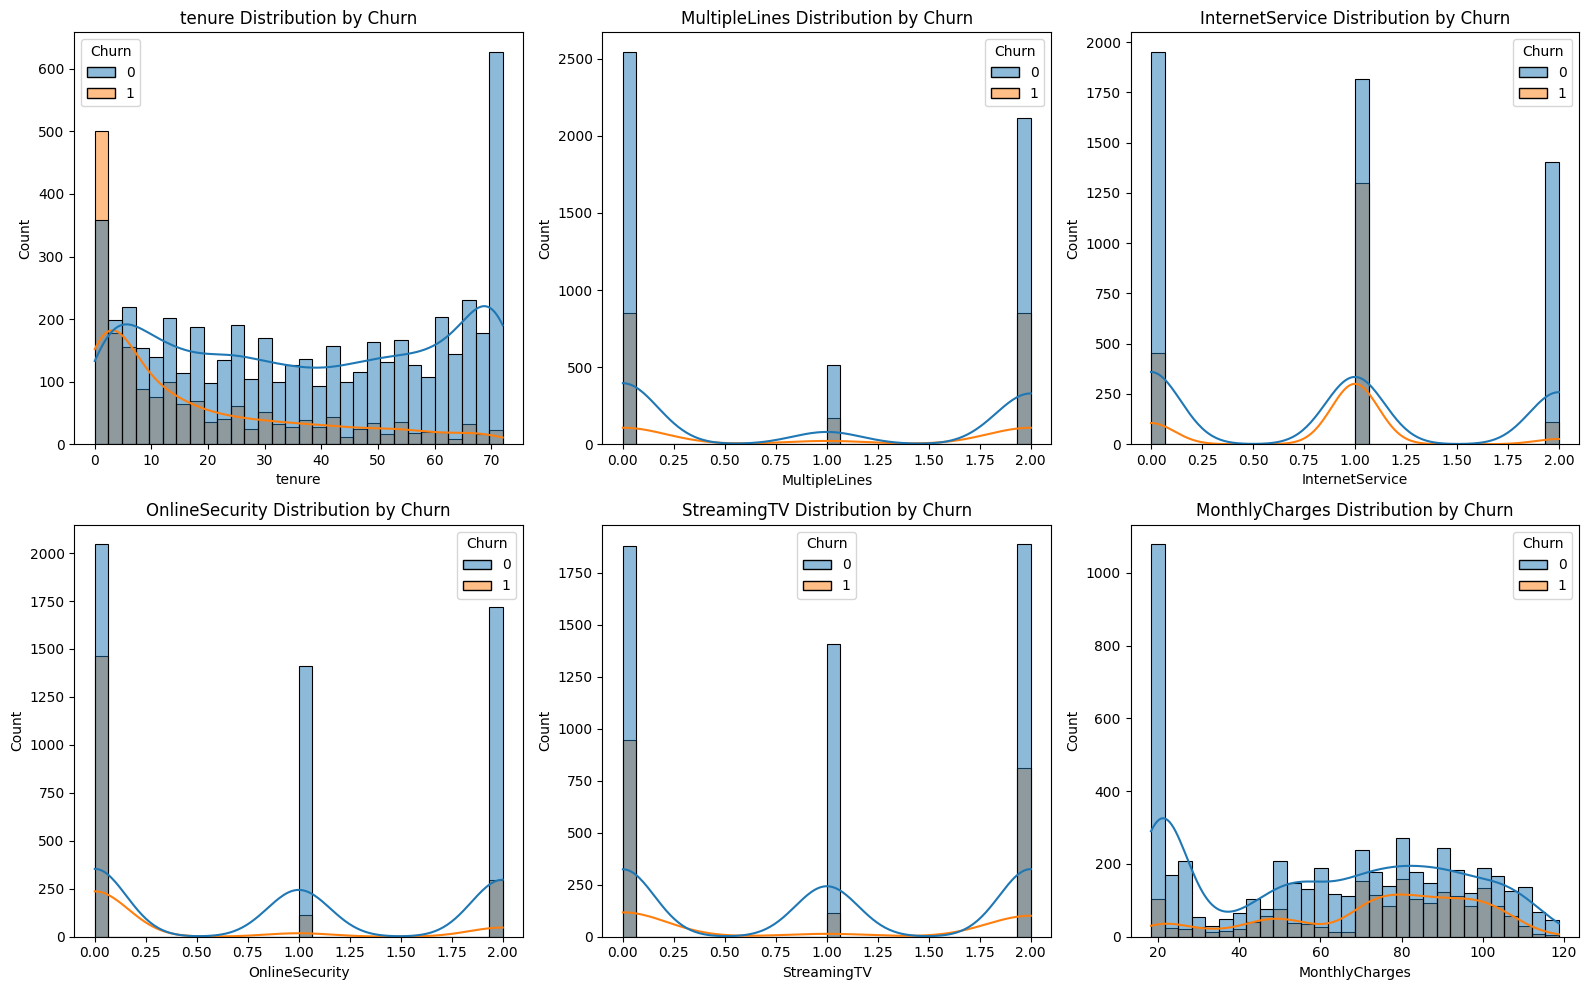

In [281]:
num_features = ['tenure','MultipleLines','InternetService','OnlineSecurity','StreamingTV','MonthlyCharges']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='Churn', bins=30, kde=True)
    plt.title(f"{feature} Distribution by Churn")
plt.tight_layout()
plt.show()

# **Splitting the Data**

---



In [282]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

---



In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Logistic Regression**

In [288]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)
}

lr_results_df = pd.DataFrame([lr_results])
lr_results_df

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.809794,0.802017,0.809794,0.804153


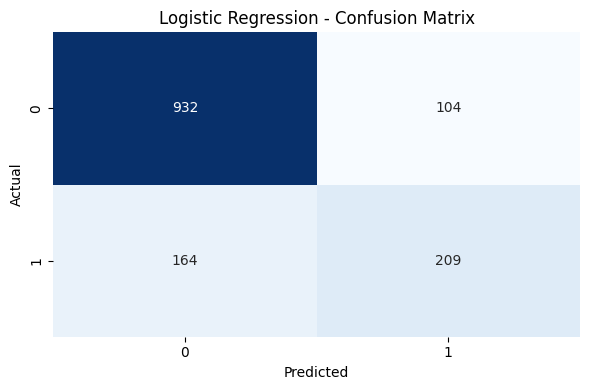

In [289]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# **Decision tree**

In [290]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

tree_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_tree, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_tree, average='weighted', zero_division=0)
}

tree_results_df = pd.DataFrame([tree_results])
tree_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.728886,0.729352,0.728886,0.729117


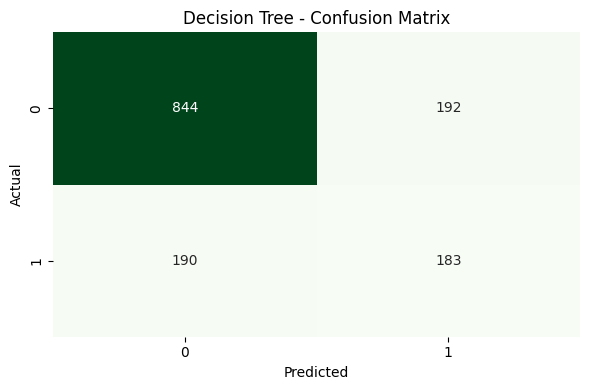

In [291]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# **SVC**

In [294]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

svm_results = {
    "Model": "SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
}

svm_results_df = pd.DataFrame([svm_results])
svm_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.735273,0.540627,0.735273,0.623103


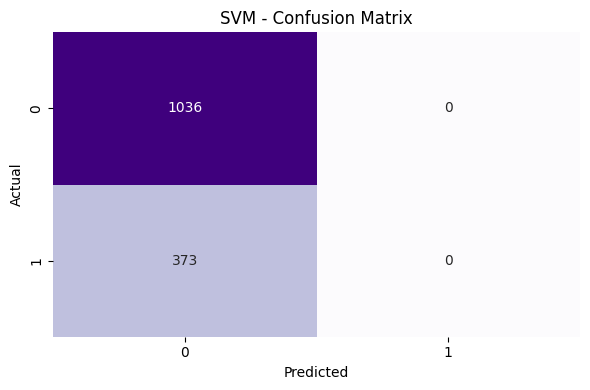

In [295]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [296]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
}

rf_results_df = pd.DataFrame([rf_results])
rf_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.793471,0.781841,0.793471,0.783999


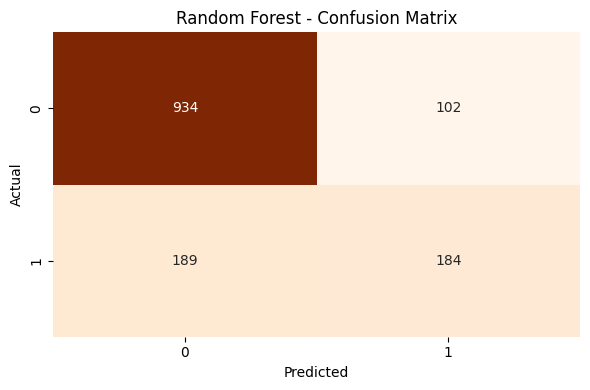

In [297]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The Logistic Regression is best model here because:

High Recall : Captures most Churns (less false negatives).

High Precision : Avoids false positives.

